In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import konlpy

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [ ]:
food = pd.read_csv("gdrive/My Drive/data/펫푸드_1.csv")

In [ ]:
food.head()

,기사 제목
0,"대웅펫 ""곤충 단백질 제품으로 펫푸드 시장 적극 공략"""
1,"대웅펫, 식용곤충 활용 펫푸드 시장 공략 본격화"
2,"오에스피, 펫푸드 기술력 축산 분야 충남도지사 표창"
3,"마이펫닥터, '2022 올해의 우수브랜드 대상' 반려동물 부문 1위 수상"
4,"[더벨][thebell interview]""해조류 대체육 펫푸드로 '수익·환경' 둘..."


In [ ]:
import re

def preprocessing(text):
    text = re.sub(r"[^가-힣0-9\s]", " ", text) #한글이랑 숫자, 공백만 남기기
    text = re.sub(r"\s+", " ", text) #중복 공백 없애기
    text = text.strip() #앞뒤 공백 없애기
    return text

In [ ]:
from tqdm import tqdm
tqdm.pandas()

food["기사 제목"] = food["기사 제목"].progress_map(preprocessing)

100%|██████████| 4000/4000 [00:00<00:00, 67250.63it/s]


In [ ]:
food = food.drop_duplicates()

In [ ]:
food.shape

(2315, 1)

In [ ]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '하는','그','등','및','제','과','더','도',"일","에","로",'위한',"월",'출시','개최',
             "년","것","억","반려동물","반려동물과","첫","만","for","and","the","a","in","of"]
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [ ]:
food["기사 제목"] = food["기사 제목"].map(remove_stopwords)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
vocab_size = 1000
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer = Tokenizer(oov_token = oov_tok)
tokenizer

In [ ]:
food_token = tokenizer.fit_on_texts(food["기사 제목"])

In [ ]:
word_to_index = tokenizer.word_index
word_to_index

{'<oov>': 1,
 '펫푸드': 2,
 '펫': 3,
 '시장': 4,
 '하림펫푸드': 5,
 '프리미엄': 6,
 '브랜드': 7,
 '동원': 8,
 '푸드': 9,
 '사료': 10,
 '진행': 11,
 '진출': 12,
 '국내': 13,
 '오에스피': 14,
 '하림': 15,
 '반려견': 16,
 '이벤트': 17,
 '기업': 18,
 '더리얼': 19,
 '사업': 20,
 '론칭': 21,
 '유기농': 22,
 '펫페어': 23,
 '식품업계': 24,
 '공략': 25,
 '리얼푸드': 26,
 '강아지': 27,
 '고양이': 28,
 '기부': 29,
 '제품': 30,
 '캠페인': 31,
 '쿠팡': 32,
 '뉴트리플랜': 33,
 '대주펫푸드': 34,
 '2022': 35,
 '간식': 36,
 '시대': 37,
 '수상': 38,
 '최초': 39,
 '산업': 40,
 '케이펫페어': 41,
 '잡아라': 42,
 '수출': 43,
 '펫케어': 44,
 '오픈': 45,
 '신제품': 46,
 '로얄캐닌': 47,
 '글로벌': 48,
 '참가': 49,
 '마이펫페어': 50,
 '펫팸족': 51,
 '최대': 52,
 '체결': 53,
 '개발': 54,
 '동원디어푸드': 55,
 '일산': 56,
 '플랫폼': 57,
 '유한양행': 58,
 '제일펫푸드': 59,
 '대상': 60,
 '인기': 61,
 '전문': 62,
 '펫시장': 63,
 '부문': 64,
 '함께하는': 65,
 '전용': 66,
 '상장': 67,
 '와': 68,
 '경쟁': 69,
 '영양': 70,
 '확대': 71,
 '선봬': 72,
 '웰츠': 73,
 '본격': 74,
 '투자': 75,
 '판매': 76,
 '인수': 77,
 '함께': 78,
 '펫푸드시장': 79,
 '코스닥': 80,
 '대표': 81,
 '김주수': 82,
 '의성군수': 83,
 '건강': 84,
 '할인': 85,
 '서비스': 86,

In [ ]:
wc = tokenizer.word_counts
df_wc = pd.DataFrame(wc.items()).set_index(0).sort_values(by =1,ascending=False).T
df_wc

,펫푸드,펫,시장,하림펫푸드,프리미엄,브랜드,동원,푸드,사료,진행,...,스마트스토어,증정이벤트,원격돌봄,봇,3329억원,1110억,주도권,잡나,펫택시부터,탈바꿈
1,981,274,236,182,142,125,114,112,109,98,...,1,1,1,1,1,1,1,1,1,1


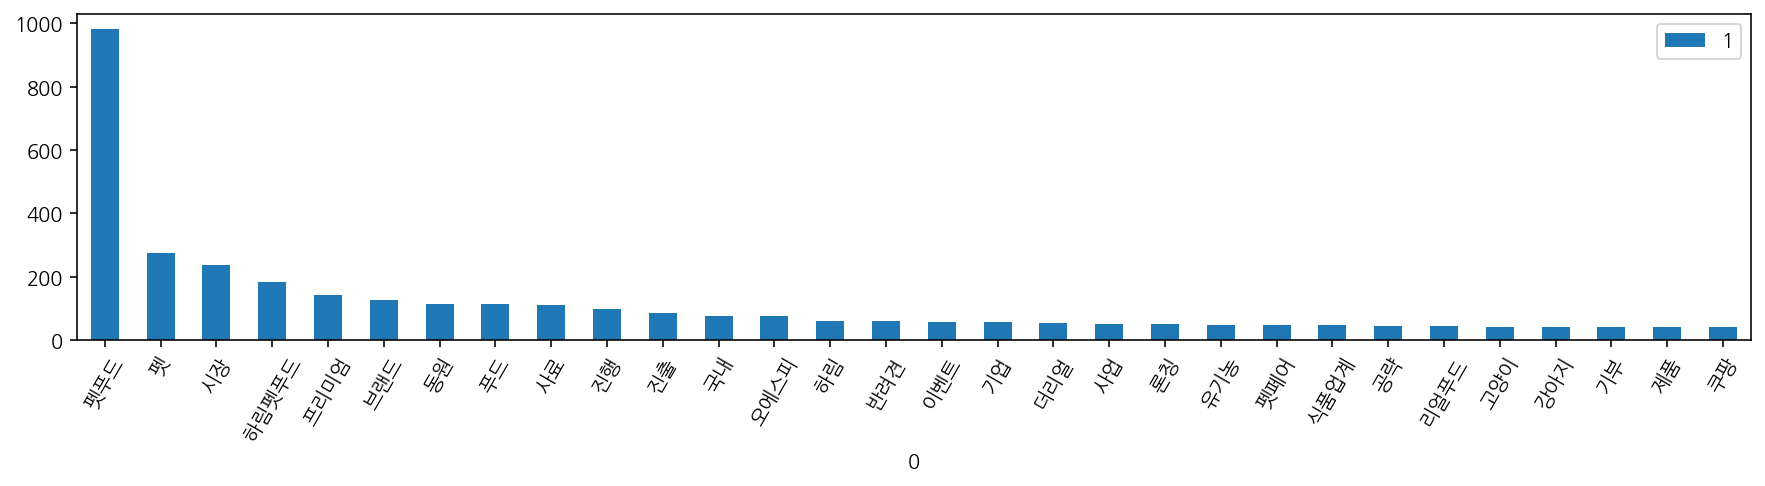

In [ ]:
df_wc.T.sort_values(by =1, ascending = False).head(30).plot.bar(rot = 60,figsize = (15,3))